In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df= pd.read_csv('/content/dataset-kidney-stone-1.csv')
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
print(df)

     gravity        ph  osmo       cond  urea      calc  target
0   1.021000  4.910000   725  14.000000   443  2.450000       0
1   1.017000  5.740000   577  20.000000   296  4.490000       0
2   1.008000  7.200000   321  14.900000   101  2.360000       0
3   1.011000  5.510000   408  12.600000   224  2.150000       0
4   1.005000  6.520000   187   7.500000    91  1.160000       0
..       ...       ...   ...        ...   ...       ...     ...
85  1.021452  5.556081   756  24.241481   367  7.669120       1
86  1.016501  6.900257   549  20.549790   204  5.775256       1
87  1.032754  5.443491  1085  23.188653   576  8.664169       1
88  1.023870  5.106433   325  12.124689    50  0.781620       1
89  1.013723  6.308943   472  16.907792   174  2.556405       1

[90 rows x 7 columns]


In [4]:
X=df.drop('target', axis=1).copy()
y=df['target'].copy()

In [5]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
X.dtypes

,0
gravity,float64
ph,float64
osmo,int64
cond,float64
urea,int64
calc,float64


In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf_xgb=xgb.XGBClassifier(objective="binary:logistic",
     eval_metric="logloss",
     learning_rate=0.1,
     max_depth=4,
     n_estimators=200



                          )
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)
# XGBClassifier(
#     objective="binary:logistic",
#     eval_metric="logloss",
#     learning_rate=0.1,
#     max_depth=4,
#     n_estimators=100,
#     use_label_encoder=False

[0]	validation_0-logloss:0.69206
[1]	validation_0-logloss:0.67263
[2]	validation_0-logloss:0.65645
[3]	validation_0-logloss:0.64895
[4]	validation_0-logloss:0.64084
[5]	validation_0-logloss:0.64113
[6]	validation_0-logloss:0.64441
[7]	validation_0-logloss:0.64260
[8]	validation_0-logloss:0.64820
[9]	validation_0-logloss:0.65347
[10]	validation_0-logloss:0.65294
[11]	validation_0-logloss:0.65960
[12]	validation_0-logloss:0.66692
[13]	validation_0-logloss:0.67479
[14]	validation_0-logloss:0.66423
[15]	validation_0-logloss:0.67209
[16]	validation_0-logloss:0.66634
[17]	validation_0-logloss:0.66905
[18]	validation_0-logloss:0.67740
[19]	validation_0-logloss:0.66349
[20]	validation_0-logloss:0.65089
[21]	validation_0-logloss:0.64760
[22]	validation_0-logloss:0.63689
[23]	validation_0-logloss:0.64064
[24]	validation_0-logloss:0.63052
[25]	validation_0-logloss:0.61968
[26]	validation_0-logloss:0.61086
[27]	validation_0-logloss:0.60033
[28]	validation_0-logloss:0.59309
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:


# Make predictions
y_pred = clf_xgb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.22%


In [13]:
y_pred = clf_xgb.predict(X_test)
y_pred_proba = clf_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.56      0.83      0.67         6

    accuracy                           0.72        18
   macro avg       0.72      0.75      0.71        18
weighted avg       0.78      0.72      0.73        18

Confusion Matrix:
 [[8 4]
 [1 5]]


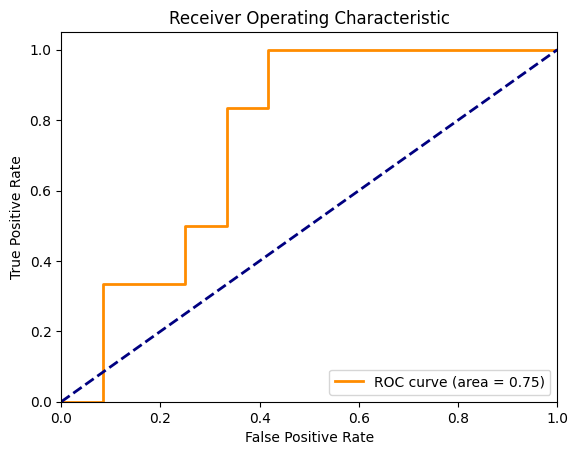

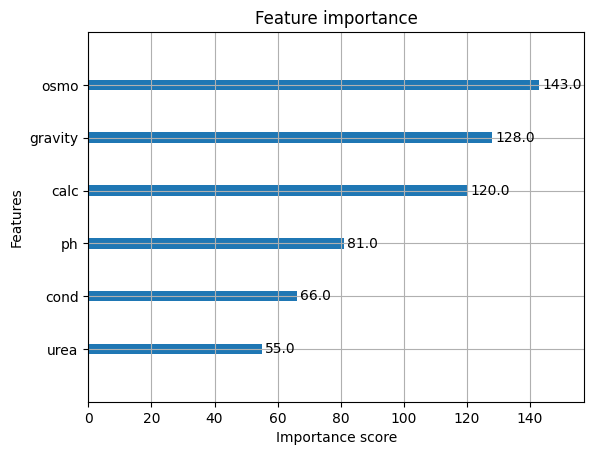

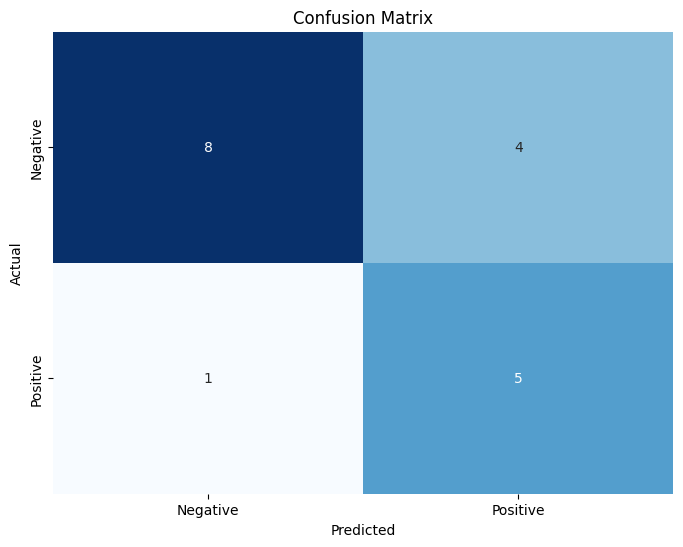

In [14]:
# prompt: add roc curve feature importance and confusion matrix

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
# Feature Importance
xgb.plot_importance(clf_xgb)
plt.show()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
